In [1]:
data_dir='./data/voice/processed/'
import os
from scipy.io.wavfile import read
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from PIL import Image
import scipy.misc
import cv2
import librosa
from tqdm import tqdm
import numpy as np
import librosa
import librosa.display
import os
import glob
import scipy
import matplotlib.pyplot as plt
import librosa
import IPython
import cv2
from IPython.display import Audio
import soundfile as sf
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tqdm import tqdm
cmap = plt.get_cmap('inferno')
import python_speech_features as mfcc
data=[]
label=[]
file = './data/voice/final_val.csv'
df = pd.read_csv(file)
df = df.drop(['Unnamed: 0'],axis=1)
df = df.drop_duplicates('ID')
df

,ID,Age,Gender,Voice Handicap Index (VHI) Score,Reflux Symptom Index (RSI) Score,Smoker,Alcohol consumption,Amount of water's litres drink every day,Tomatoes,Coffee,Chocolate,Soft cheese,Citrus fruits,Diagnosis
0,voice001,32,1,15,5,0,1,1,1,3,0,1,1,1
1,voice002,55,1,17,12,1,1,0,1,1,1,3,3,0
2,voice003,34,1,42,26,0,1,1,1,3,1,3,0,1
3,voice004,28,0,20,9,1,1,1,1,4,1,3,1,2
4,voice005,54,0,39,23,0,1,1,1,2,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,voice204,59,0,0,7,0,0,2,1,1,1,0,0,0
204,voice205,30,0,62,19,1,1,1,1,4,3,1,1,1
205,voice206,22,0,0,6,0,0,2,1,1,1,1,0,0
206,voice207,30,0,0,26,0,0,2,1,2,1,1,1,0


In [2]:
windowLength=255
fftLength=2046
hop_length=63
frame_length=8096

In [4]:
data = []
labels=[]
directory = './data/voice/split_10/'
for root, dirnames, filenames in tqdm(os.walk(directory)):
    for filename in filenames:
        if filename.endswith('.wav'):
            y,sr = librosa.load(os.path.join(root, filename),sr =8000)
#             print(sr)
            data.append(librosa.stft(y,n_fft=2046))
            labels.append(int(root.split('/')[-1]))

5it [00:43,  8.68s/it]


In [5]:

# y,sr = librosa.load(os.path.join(root, filename),sr =8000); 
# # mfccs.shape
# librosa.stft(y,n_fft=2046).shape#,hop_length=hop_length,win_length=windowLength).shape
np.array(data).shape
# max(y)

(2060, 1024, 8)

In [6]:
clean_data = np.array(data)
clean_labels = np.array(labels)


# Audio(clean_data[1], rate=8000)
# clean_data
# data

In [7]:
data = []
labels=[]
count = 10
directory = './data/noise/audio'
for root, dirnames, filenames in os.walk(directory):
    for filename in tqdm(filenames):
        if filename.endswith('.wav'):
            clas = filename.split('-')[1]
            if clas=='0':
                x,samplerate = librosa.load(os.path.join(root, filename),sr=8000);  # Reading the audio file
                break

  0%|                                                                                  | 1/817 [00:00<02:27,  5.52it/s]


In [9]:
# plt.plot(noisy_data+clean_data[3])
# plt.show()
Audio(x, rate=8000)

In [8]:
# x,samplerate = librosa.load(os.path.join(root, filename),sr=8000)
# librosa.stft(np.array(x)).shape
# x[:3809]

In [10]:
noisy_data=x[:3809]
noise = librosa.stft(np.array(noisy_data),n_fft=2046)
# noise = librosa.feature.mfcc(np.array(noisy_data), sr=8000,n_mfcc=12)
print(np.array(noise).shape)
Audio(noisy_data, rate=8000)


(1024, 8)


In [11]:
np.array(noise).shape

(1024, 8)

In [12]:

noise_added=[]
for i in tqdm(clean_data):
    noise_added.append(i+noise)


100%|███████████████████████████████████████████████████████████████████████████| 2060/2060 [00:00<00:00, 15930.58it/s]


C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


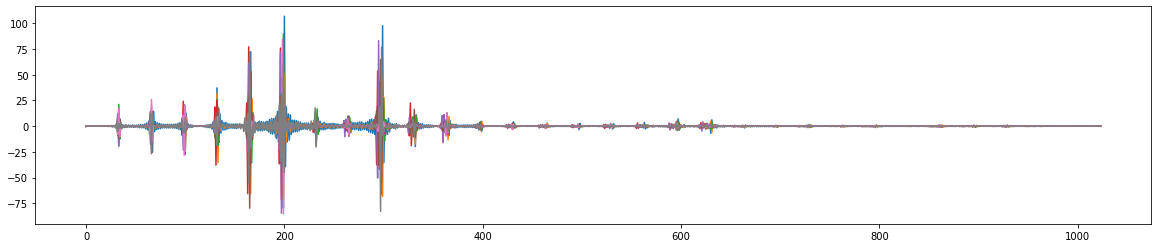

C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[-103.64047  -96.12762  -99.40799  -99.4801   -99.29329  -98.86476
 -101.82621  -94.39748]


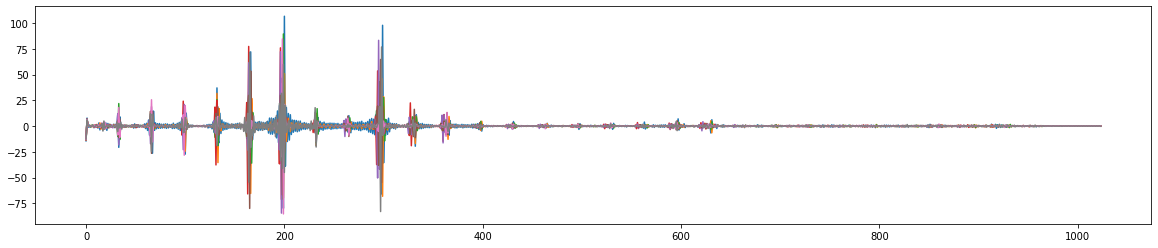

[-60.904278 -61.32659  -62.006912 -62.001057 -61.85677  -61.510727
 -61.53858  -61.670376]


In [23]:
import numpy as np
import math
def signaltonoise_dB(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return 20*np.log10(abs(np.where(sd == 0, 0, m/sd)))
plt.figure(figsize=(20,4))
plt.plot(clean_data[1])
plt.show()
print(signaltonoise_dB(clean_data[1], axis=0, ddof=0))

# plt.plot(noise)
# plt.show()
# print(signaltonoise(noise, axis=0, ddof=0))
plt.figure(figsize=(20,4))
plt.plot(noise_added[1])
plt.show()
print(signaltonoise_dB(noise_added[1], axis=0, ddof=0))

In [57]:
# len(clean_data[int(len(clean_data)*0.2):])
# len(clean_data[:int(len(clean_data)*0.8)])
# test = [i for i in range(20)]
# test[int(len(test)*0.2):],test[:int(len(test)*0.2)]

In [49]:
train_clean = np.array(clean_data[int(len(clean_data)*0.2):])
train_noise = np.array(noise_added[int(len(noise_added)*0.2):])
test_clean = np.array(clean_data[:int(len(clean_data)*0.2)])
test_noise = np.array(noise_added[:int(len(noise_added)*0.2)])
test_noise.shape,test_clean.shape,train_clean.shape,train_noise.shape

((412, 1024, 8), (412, 1024, 8), (1648, 1024, 8), (1648, 1024, 8))

In [65]:
from UNET.IDCNN.Models import MultiResUNet,UNetpsps,UNet,UNetE
import tensorflow as tf
print(tf.__version__)
# tf.test.is_gpu_available()
tf.config.list_physical_devices('GPU')

2.3.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [69]:
length = 1024  # Length of each Segment
model_name = 'UNet'#'MultiResUNet'  # UNet or UNetPP
model_depth = 5  # Number of Level in the CNN Model
model_width = 64  # Width of the Initial Layer, subsequent layers start from here
kernel_size = 3  # Size of the Kernels/Filter
num_channel = 8  # Number of Channels in the Model
D_S = 1  # Turn on Deep Supervision
A_E = 1  # Turn on AutoEncoder Mode for Feature Extraction
A_G = 1  # Turn on for Guided Attention
LSTM = 0  # Turn on for LSTM, Implemented for UNet and MultiResUNet only
problem_type = 'Regression'
output_nums = 1  # Number of Class for Classification Problems, always '1' for Regression Problems
is_transconv = True # True: Transposed Convolution, False: UpSampling
'''Only required if the AutoEncoder Mode is turned on'''
feature_number = 1024  # Number of Features to be Extracted
alpha = 1 
# model = MultiResUNet.UNet(length, model_depth, num_channel, model_width, kernel_size, problem_type=problem_type, output_nums=output_nums,
#                  ds=D_S, ae=A_E, ag=A_G, lstm=LSTM, alpha=alpha, is_transconv=is_transconv).MultiResUNet()
model = UNetpsps.UNet(length, model_depth, num_channel, model_width, kernel_size, problem_type=problem_type, output_nums=output_nums,
                 ds=D_S, ae=A_E, ag=A_G, lstm=LSTM, is_transconv=is_transconv).UNetPP()

In [70]:
model.summary()

Model: "functional_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 1024, 8)]    0                                            
__________________________________________________________________________________________________
conv1d_382 (Conv1D)             (None, 1024, 64)     1600        input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_502 (BatchN (None, 1024, 64)     256         conv1d_382[0][0]                 
__________________________________________________________________________________________________
activation_432 (Activation)     (None, 1024, 64)     0           batch_normalization_502[0][0]    
______________________________________________________________________________________

__________________________________________________________________________________________________
conv1d_transpose_168 (Conv1DTra (None, 1024, 1)      3           activation_589[0][0]             
__________________________________________________________________________________________________
conv1d_transpose_169 (Conv1DTra (None, 1024, 64)     16448       activation_575[0][0]             
__________________________________________________________________________________________________
concatenate_100 (Concatenate)   (None, 1024, 128)    0           tf_op_layer_Mul_100[0][0]        
                                                                 tf_op_layer_Mul_101[0][0]        
__________________________________________________________________________________________________
tf_op_layer_Mul_102 (TensorFlow [(None, 1024, 64)]   0           activation_521[0][0]             
                                                                 add_205[0][0]                    
__________

In [71]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.000001), loss = tf.keras.losses.Huber(), metrics = tf.keras.metrics.RootMeanSquaredError())

history = model.fit(train_noise,train_clean,
                              epochs=150,
                              verbose=1,
                              batch_size=2,
                              validation_data=(test_noise,test_clean))#,callbacks=[saver])

Epoch 1/150


KeyboardInterrupt: 

In [19]:
model.save('UNET_PP_STFT_150.h5',overwrite=True)


In [21]:
history = model.fit(train_noise,train_clean,
                              epochs=250,
                              verbose=1,
                              batch_size=2,
                              validation_data=(test_noise,test_clean))#,callbacks=[saver])

Epoch 1/250
206/206 [==============================] - 112s 546ms/step - loss: 4.4428 - out_loss: 0.7388 - level1_loss: 0.7388 - level2_loss: 0.7389 - level3_loss: 0.7393 - level4_loss: 0.7407 - level5_loss: 0.7462 - out_root_mean_squared_error: 3.5998 - level1_root_mean_squared_error: 3.5996 - level2_root_mean_squared_error: 3.5999 - level3_root_mean_squared_error: 3.6004 - level4_root_mean_squared_error: 3.6009 - level5_root_mean_squared_error: 3.5836 - val_loss: 5.0745 - val_out_loss: 0.8450 - val_level1_loss: 0.8453 - val_level2_loss: 0.8454 - val_level3_loss: 0.8456 - val_level4_loss: 0.8460 - val_level5_loss: 0.8471 - val_out_root_mean_squared_error: 4.2775 - val_level1_root_mean_squared_error: 4.2778 - val_level2_root_mean_squared_error: 4.2796 - val_level3_root_mean_squared_error: 4.2811 - val_level4_root_mean_squared_error: 4.2845 - val_level5_root_mean_squared_error: 4.2781
Epoch 2/250
206/206 [==============================] - 112s 546ms/step - loss: 4.4428 - out_loss: 0.738

206/206 [==============================] - 114s 553ms/step - loss: 4.4430 - out_loss: 0.7389 - level1_loss: 0.7389 - level2_loss: 0.7390 - level3_loss: 0.7394 - level4_loss: 0.7408 - level5_loss: 0.7459 - out_root_mean_squared_error: 3.6007 - level1_root_mean_squared_error: 3.6003 - level2_root_mean_squared_error: 3.6008 - level3_root_mean_squared_error: 3.6012 - level4_root_mean_squared_error: 3.6016 - level5_root_mean_squared_error: 3.5861 - val_loss: 5.0740 - val_out_loss: 0.8451 - val_level1_loss: 0.8452 - val_level2_loss: 0.8453 - val_level3_loss: 0.8455 - val_level4_loss: 0.8459 - val_level5_loss: 0.8469 - val_out_root_mean_squared_error: 4.2784 - val_level1_root_mean_squared_error: 4.2786 - val_level2_root_mean_squared_error: 4.2808 - val_level3_root_mean_squared_error: 4.2819 - val_level4_root_mean_squared_error: 4.2850 - val_level5_root_mean_squared_error: 4.2755
Epoch 20/250
206/206 [==============================] - 114s 553ms/step - loss: 4.4425 - out_loss: 0.7388 - level1_

206/206 [==============================] - 112s 541ms/step - loss: 4.4421 - out_loss: 0.7388 - level1_loss: 0.7388 - level2_loss: 0.7389 - level3_loss: 0.7392 - level4_loss: 0.7406 - level5_loss: 0.7459 - out_root_mean_squared_error: 3.5998 - level1_root_mean_squared_error: 3.5996 - level2_root_mean_squared_error: 3.5999 - level3_root_mean_squared_error: 3.6004 - level4_root_mean_squared_error: 3.6008 - level5_root_mean_squared_error: 3.5859 - val_loss: 5.0788 - val_out_loss: 0.8457 - val_level1_loss: 0.8458 - val_level2_loss: 0.8459 - val_level3_loss: 0.8462 - val_level4_loss: 0.8468 - val_level5_loss: 0.8483 - val_out_root_mean_squared_error: 4.2769 - val_level1_root_mean_squared_error: 4.2776 - val_level2_root_mean_squared_error: 4.2790 - val_level3_root_mean_squared_error: 4.2813 - val_level4_root_mean_squared_error: 4.2835 - val_level5_root_mean_squared_error: 4.2802
Epoch 38/250
206/206 [==============================] - 113s 549ms/step - loss: 4.4428 - out_loss: 0.7388 - level1_

206/206 [==============================] - 114s 553ms/step - loss: 4.4425 - out_loss: 0.7388 - level1_loss: 0.7389 - level2_loss: 0.7389 - level3_loss: 0.7393 - level4_loss: 0.7407 - level5_loss: 0.7459 - out_root_mean_squared_error: 3.5998 - level1_root_mean_squared_error: 3.5995 - level2_root_mean_squared_error: 3.6000 - level3_root_mean_squared_error: 3.6005 - level4_root_mean_squared_error: 3.6009 - level5_root_mean_squared_error: 3.5858 - val_loss: 5.0770 - val_out_loss: 0.8456 - val_level1_loss: 0.8458 - val_level2_loss: 0.8457 - val_level3_loss: 0.8460 - val_level4_loss: 0.8464 - val_level5_loss: 0.8476 - val_out_root_mean_squared_error: 4.2787 - val_level1_root_mean_squared_error: 4.2789 - val_level2_root_mean_squared_error: 4.2810 - val_level3_root_mean_squared_error: 4.2837 - val_level4_root_mean_squared_error: 4.2862 - val_level5_root_mean_squared_error: 4.2785
Epoch 56/250
206/206 [==============================] - 115s 558ms/step - loss: 4.4422 - out_loss: 0.7388 - level1_

206/206 [==============================] - 115s 559ms/step - loss: 4.4416 - out_loss: 0.7387 - level1_loss: 0.7387 - level2_loss: 0.7388 - level3_loss: 0.7391 - level4_loss: 0.7405 - level5_loss: 0.7457 - out_root_mean_squared_error: 3.6000 - level1_root_mean_squared_error: 3.5998 - level2_root_mean_squared_error: 3.6003 - level3_root_mean_squared_error: 3.6008 - level4_root_mean_squared_error: 3.6011 - level5_root_mean_squared_error: 3.5858 - val_loss: 5.0762 - val_out_loss: 0.8453 - val_level1_loss: 0.8455 - val_level2_loss: 0.8457 - val_level3_loss: 0.8460 - val_level4_loss: 0.8464 - val_level5_loss: 0.8472 - val_out_root_mean_squared_error: 4.2763 - val_level1_root_mean_squared_error: 4.2768 - val_level2_root_mean_squared_error: 4.2785 - val_level3_root_mean_squared_error: 4.2801 - val_level4_root_mean_squared_error: 4.2828 - val_level5_root_mean_squared_error: 4.2808
Epoch 74/250
206/206 [==============================] - 115s 556ms/step - loss: 4.4415 - out_loss: 0.7387 - level1_

206/206 [==============================] - 114s 551ms/step - loss: 4.4413 - out_loss: 0.7387 - level1_loss: 0.7387 - level2_loss: 0.7388 - level3_loss: 0.7391 - level4_loss: 0.7404 - level5_loss: 0.7457 - out_root_mean_squared_error: 3.5997 - level1_root_mean_squared_error: 3.5996 - level2_root_mean_squared_error: 3.6002 - level3_root_mean_squared_error: 3.6003 - level4_root_mean_squared_error: 3.6007 - level5_root_mean_squared_error: 3.5859 - val_loss: 5.0771 - val_out_loss: 0.8456 - val_level1_loss: 0.8458 - val_level2_loss: 0.8458 - val_level3_loss: 0.8460 - val_level4_loss: 0.8464 - val_level5_loss: 0.8474 - val_out_root_mean_squared_error: 4.2761 - val_level1_root_mean_squared_error: 4.2765 - val_level2_root_mean_squared_error: 4.2780 - val_level3_root_mean_squared_error: 4.2798 - val_level4_root_mean_squared_error: 4.2828 - val_level5_root_mean_squared_error: 4.2792
Epoch 92/250
206/206 [==============================] - 115s 557ms/step - loss: 4.4412 - out_loss: 0.7387 - level1_

206/206 [==============================] - 114s 553ms/step - loss: 4.4414 - out_loss: 0.7387 - level1_loss: 0.7387 - level2_loss: 0.7388 - level3_loss: 0.7391 - level4_loss: 0.7404 - level5_loss: 0.7457 - out_root_mean_squared_error: 3.6002 - level1_root_mean_squared_error: 3.5998 - level2_root_mean_squared_error: 3.6003 - level3_root_mean_squared_error: 3.6009 - level4_root_mean_squared_error: 3.6012 - level5_root_mean_squared_error: 3.5860 - val_loss: 5.0772 - val_out_loss: 0.8456 - val_level1_loss: 0.8457 - val_level2_loss: 0.8458 - val_level3_loss: 0.8459 - val_level4_loss: 0.8464 - val_level5_loss: 0.8479 - val_out_root_mean_squared_error: 4.2756 - val_level1_root_mean_squared_error: 4.2767 - val_level2_root_mean_squared_error: 4.2782 - val_level3_root_mean_squared_error: 4.2808 - val_level4_root_mean_squared_error: 4.2842 - val_level5_root_mean_squared_error: 4.2808
Epoch 110/250
206/206 [==============================] - 114s 553ms/step - loss: 4.4417 - out_loss: 0.7387 - level1

KeyboardInterrupt: 

In [15]:
# model.save('UNET_PP_STFT_150.h5',overwrite=True)
model = tf.keras.models.load_model('UNET_PP_STFT_150.h5')

In [16]:
np.save('clean_pad.npy', clean_pad)
np.save('noise_added.npy', noise_added)
np.save('clean_data.npy', clean_data)

np.save('clean_labels.npy', np.array(clean_labels))

In [2]:
clean_data = np.load('clean_data.npy',allow_pickle=True)
clean_labels = np.load('clean_labels.npy')
noise_added = np.load('noise_added.npy')
clean_pad = np.load('clean_pad.npy')

In [3]:
model = tf.keras.models.load_model('UNET_PP_150.h5')
clean_pad = np.array(clean_pad)

In [29]:
den = model.predict(clean_data)


In [31]:
np.array(denoised).shape

(2060, 1, 1024, 1)

In [16]:
denoised =[]
for i in tqdm(clean_data):
    
    i = np.reshape(i,(1,i.shape[0],8))
#     print(i.shape)
    op = model.predict(i,batch_size=1)
    denoised.append(op[0])
#     print(op.shape)
# denoised = model.predict(clean_pad,batch_size=1)

100%|██████████████████████████████████████████████████████████████████████████████| 2060/2060 [03:35<00:00,  9.56it/s]


In [17]:
denoised=np.reshape(denoised,(2060,1024,1))
denoised.shape

(2060, 1024, 1)

In [18]:
denoised = np.array(denoised)
denoised.shape
# i.shape

(2060, 1024, 1)

C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


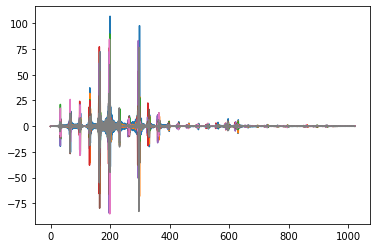

C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[-103.64047  -96.12762  -99.40799  -99.4801   -99.29329  -98.86476
 -101.82621  -94.39748]


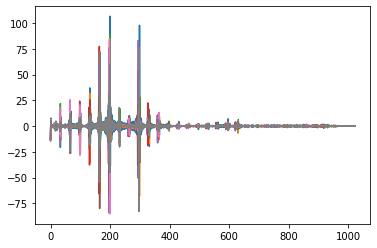

[-60.904278 -61.32659  -62.006912 -62.001057 -61.85677  -61.510727
 -61.53858  -61.670376]


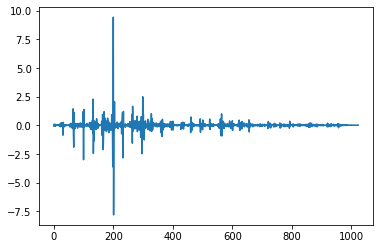

[-35.669754]


In [20]:
# den = denoised[0][1]
# print(den.shape)
# plt.plot(clean_data[1])
# plt.show()

import numpy as np
import math
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return 20*np.log10(abs(np.where(sd == 0, 0, m/sd)))

plt.plot(clean_data[1])
plt.show()
print(signaltonoise(clean_data[1], axis=0, ddof=0))

plt.plot(noise_added[1])
plt.show()
print(signaltonoise(noise_added[1], axis=0, ddof=0))

plt.plot(denoised[0])
plt.show()
print(signaltonoise(denoised[0], axis=0, ddof=0))
# Audio(den, rate=8000)

In [27]:
import librosa.display
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

path = './data/voice/UNETPP_denoised_STFT/'
if not os.path.exists(path):
    os.mkdir(path)
for i in tqdm(range(len(denoised))):
    mfccs = denoised[i]
    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    librosa.display.specshow(mfccs, sr=8000, x_axis='time',ax = ax)

    y=clean_labels[i]

    ax.axis('off')

    if not os.path.exists(path+str(y)):
        os.mkdir(path+str(y))
    fig.savefig(f'./{path+str(y)}/{i}.png',bbox_inches='tight',pad_inches = 0,dpi=200)



100%|██████████████████████████████████████████████████████████████████████████████| 2060/2060 [02:03<00:00, 16.63it/s]


In [ ]:
import librosa.display
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

path = './data/voice/UNETPP_denoised_STFT/'
if not os.path.exists(path):
    os.mkdir(path)
img_data=[]
for i in tqdm(range(len(denoised))):
    mfccs = denoised[i]
    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    librosa.display.specshow(mfccs, sr=8000, x_axis='time',ax = ax)

    y=clean_labels[i]

    ax.axis('off')
#     fig.savefig(f'./{path+str(y)}/{i}.png',bbox_inches='tight',pad_inches = 0,dpi=200)
    img_data.append(fig)


In [37]:
from UNET.IDCNN.Models import UNetpsps
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
output_matrix = to_categorical(clean_labels, num_classes = 4)

X_train, X_test,y_train, y_test = train_test_split(denoised,output_matrix ,
                                       random_state=98, 
                                       test_size=0.2, 
                                       shuffle=False)

In [40]:
cl_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(64, (5),activation='relu', input_shape=(1024,1)),
    tf.keras.layers.MaxPooling1D(5),
        #tf.keras.layers.BatchNormalization(),
    #     tf.keras.layers.LSTM(128,return_sequences=True),
        tf.keras.layers.Conv1D(32, (3),activation='relu',strides =1,padding="same",activity_regularizer=tf.keras.regularizers.L1L2(l1=0.3, l2=0.01)),
    #     tf.keras.layers.Flatten(),
    #     #tf.keras.layers.BatchNormalization(),
    #     tf.keras.layers.Dropout(0.2),
    #     tf.keras.layers.Dense(8, activation='relu'),
    #     tf.keras.layers.Dense(1, activation='sigmoid')
    # tf.keras.layers.LocallyConnected1D(64, (3),activation='relu',padding="valid", input_shape=(4, 4096)),
    tf.keras.layers.MaxPooling1D(2),
    # tf.keras.layers.LSTM(128,return_sequences=True),
    #tf.keras.layers.LocallyConnected1D(128, (1),activation='relu'),
    # tf.keras.layers.Conv1D(128, (3),activation='relu',padding='same'),
    #tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
    ])

In [41]:
cl_model.compile(optimizer='adam'  ,loss='categorical_crossentropy', metrics=['acc'])
history = cl_model.fit(x=X_train,y=y_train,
                              epochs=150,
                              verbose=1,
                              batch_size=1,
                              validation_data=(X_test,y_test))#,callbacks=[saver])

Epoch 1/150
1648/1648 [==============================] - 9s 5ms/step - loss: 1.5226 - acc: 0.4290 - val_loss: 2.5003 - val_acc: 0.0000e+00
Epoch 2/150
1648/1648 [==============================] - 8s 5ms/step - loss: 1.1169 - acc: 0.4308 - val_loss: 3.3211 - val_acc: 0.0000e+00
Epoch 3/150
 685/1648 [===========>..................] - ETA: 4s - loss: 1.0885 - acc: 0.4380

KeyboardInterrupt: 

In [27]:
# cl_model.compile(optimizer='adam'  ,loss='categorical_crossentropy', metrics=['acc'])
# model.summary()
from UNET.IDCNN.Models import UNetpsps
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
output_matrix = to_categorical(clean_labels, num_classes = 4)

X_train, X_test,y_train, y_test = train_test_split(denoised,output_matrix ,
                                       random_state=98, 
                                       test_size=0.2, 
                                       shuffle=False)
# history = cl_model.fit(x=X_train,y=y_train,
#                               epochs=150,
#                               verbose=1,
#                               batch_size=32,
#                               validation_data=(X_test,y_test))#,callbacks=[saver])

length = 3872  # Length of each Segment
model_name = 'UNetPP'#'MultiResUNet'  # UNet or UNetPP
model_depth = 5  # Number of Level in the CNN Model
model_width = 64  # Width of the Initial Layer, subsequent layers start from here
kernel_size = 3  # Size of the Kernels/Filter
num_channel = 1  # Number of Channels in the Model
D_S = 1  # Turn on Deep Supervision
A_E = 0  # Turn on AutoEncoder Mode for Feature Extraction
A_G = 1  # Turn on for Guided Attention
LSTM = 0  # Turn on for LSTM, Implemented for UNet and MultiResUNet only
problem_type = 'Classification'
output_nums = 4  # Number of Class for Classification Problems, always '1' for Regression Problems
is_transconv = True # True: Transposed Convolution, False: UpSampling
'''Only required if the AutoEncoder Mode is turned on'''
feature_number = 1024  # Number of Features to be Extracted
alpha = 1 
# model = MultiResUNet.UNet(length, model_depth, num_channel, model_width, kernel_size, problem_type=problem_type, output_nums=output_nums,
#                  ds=D_S, ae=A_E, ag=A_G, lstm=LSTM, alpha=alpha, is_transconv=is_transconv).MultiResUNet()
model = UNetpsps.UNet(length, model_depth, num_channel, model_width, kernel_size, problem_type=problem_type, output_nums=output_nums,
                 ds=D_S, ae=A_E, ag=A_G, lstm=LSTM, is_transconv=is_transconv).UNetPP()
model.compile(optimizer = 'adam', loss = tf.keras.losses.Huber(), metrics = ['mae'])

In [28]:
np.reshape(X_train,(1648, 3872)).shape

(1648, 3872)

In [29]:
model.summary()

Model: "functional_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 3872, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_735 (Conv1D)             (None, 3872, 64)     256         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_985 (BatchN (None, 3872, 64)     256         conv1d_735[0][0]                 
__________________________________________________________________________________________________
activation_810 (Activation)     (None, 3872, 64)     0           batch_normalization_985[0][0]    
______________________________________________________________________________________

conv1d_870 (Conv1D)             (None, 1936, 1)      65          activation_957[0][0]             
__________________________________________________________________________________________________
activation_960 (Activation)     (None, 1936, 64)     0           add_414[0][0]                    
__________________________________________________________________________________________________
add_416 (Add)                   (None, 1936, 64)     0           batch_normalization_1171[0][0]   
                                                                 batch_normalization_1172[0][0]   
__________________________________________________________________________________________________
conv1d_877 (Conv1D)             (None, 1936, 64)     4160        activation_811[0][0]             
__________________________________________________________________________________________________
conv1d_878 (Conv1D)             (None, 1936, 64)     8256        activation_953[0][0]             
__________

In [12]:
y_train.shape,y_test.shape,np.array(X_test).shape,np.array(X_train).shape

((1648, 4), (412, 4), (412, 3872, 1), (1648, 3872, 1))

In [13]:
model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['acc'])
history = model.fit(x=X_train,y=y_train,
                              epochs=150,
                              verbose=1,
                              batch_size=1,
                              validation_data=(X_test,y_test))#,callbacks=[saver])

Epoch 1/150


ValueError: in user code:

    C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:749 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (1, 4) and (1, 3872, 4) are incompatible


In [50]:
mer=[]
cl_model_inp_1 = tf.keras.layers.Input(shape=(denoised[0].shape[1],1))
x = tf.keras.layers.Conv1D(32, (3),activation='relu',strides =1,padding="same")(cl_model_inp_1)
x=tf.keras.layers.MaxPooling1D(2)(x)
x = tf.keras.layers.BatchNormalization()(x)
mer.append(x)

cl_model_inp_2 = tf.keras.layers.Input(shape=(denoised[0].shape[1],1))
x = tf.keras.layers.Conv1D(32, (3),activation='relu',strides =1,padding="same")(cl_model_inp_2)
x=tf.keras.layers.MaxPooling1D(2)(x)
x = tf.keras.layers.BatchNormalization()(x)
mer.append(x)

cl_model_inp_3 = tf.keras.layers.Input(shape=(denoised[0].shape[1],1))
x=tf.keras.layers.Conv1D(32, (3),activation='relu',strides =1,padding="same")(cl_model_inp_3)
x=tf.keras.layers.MaxPooling1D(2)(x)
x = tf.keras.layers.BatchNormalization()(x)
mer.append(x)

cl_model_inp_4 = tf.keras.layers.Input(shape=(denoised[0].shape[1],1))
x=tf.keras.layers.Conv1D(32, (3),activation='relu',strides =1,padding="same")(cl_model_inp_4)
x=tf.keras.layers.MaxPooling1D(2)(x)
x = tf.keras.layers.BatchNormalization()(x)
mer.append(x)

cl_model_inp_5 = tf.keras.layers.Input(shape=(denoised[0].shape[1],1))
x=tf.keras.layers.Conv1D(32, (3),activation='relu',strides =1,padding="same")(cl_model_inp_5)
x=tf.keras.layers.MaxPooling1D(2)(x)
x = tf.keras.layers.BatchNormalization()(x)
mer.append(x)

cl_model_inp_6 = tf.keras.layers.Input(shape=(denoised[0].shape[1],1))
x=tf.keras.layers.Conv1D(32, (3),activation='relu',strides =1,padding="same")(cl_model_inp_6)
x=tf.keras.layers.MaxPooling1D(2)(x)
x = tf.keras.layers.BatchNormalization()(x)
mer.append(x)



merge = tf.keras.layers.Concatenate(axis=-1)(mer)

x=tf.keras.layers.Conv1D(8, (3),activation='relu',strides =1,padding="same")(merge)
x=tf.keras.layers.MaxPooling1D(2)(x)
x = tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Conv1D(4, (3),activation='relu',strides =1,padding="same")(x)
x=tf.keras.layers.MaxPooling1D(2)(x)
x = tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Flatten()(x)

x=tf.keras.layers.Dense(200)(x)
x = tf.keras.layers.BatchNormalization()(x)
x =tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(4,activation='softmax')(x)

inp=[cl_model_inp_1,cl_model_inp_2,cl_model_inp_3,cl_model_inp_4,cl_model_inp_5,cl_model_inp_6]


model = tf.keras.Model(inputs=inp, outputs=output, name="final_model")
# lin_trainX.shape,lin_trainY.shape,lin_valX.shape,lin_valY.shape
# cnn_trainX.shape,cnn_trainY.shape,cnn_valX.shape,cnn_valY.shape
model.compile(optimizer='adam'  ,loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "final_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_68 (InputLayer)           [(None, 3872, 1)]    0                                            
__________________________________________________________________________________________________
input_69 (InputLayer)           [(None, 3872, 1)]    0                                            
__________________________________________________________________________________________________
input_70 (InputLayer)           [(None, 3872, 1)]    0                                            
__________________________________________________________________________________________________
input_71 (InputLayer)           [(None, 3872, 1)]    0                                            
________________________________________________________________________________________

In [51]:
# cl_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
# cl_model.summary()

In [42]:
from tensorflow.keras.utils import to_categorical
output_matrix = to_categorical(clean_labels, num_classes = 4)


In [43]:
# train_clean = np.array(clean_pad[int(len(clean_pad)*0.8):])
# train_noise = np.array(noise_added[int(len(noise_added)*0.8):])
# test_clean = np.array(clean_pad[:int(len(clean_pad)*0.2)])
# test_noise = np.array(noise_added[:int(len(noise_added)*0.2)])

from sklearn.model_selection import train_test_split
F_X_train=[]
F_X_test=[]
for i in range(6):
    X_train, X_test,y_train, y_test = train_test_split(denoised[i],output_matrix ,
                                       random_state=98, 
                                       test_size=0.2, 
                                       shuffle=False)
    F_X_train.append(X_train)
    F_X_test.append(X_test)

((1648, 4), (412, 4), (6, 412, 3872, 1), (6, 1648, 3872, 1))

In [45]:
from tensorflow.keras.utils import plot_model
# plot_model(cl_model, to_file='cl_model.png', show_shapes=True, show_layer_names=True)
# F_y_train

In [52]:
history = model.fit(x=F_X_train,y=np.array(y_train),
                              epochs=150,
                              verbose=1,
                              batch_size=32,
                              validation_data=(F_X_test,np.array(y_test)))#,callbacks=[saver])

Epoch 1/150
52/52 [==============================] - 3s 58ms/step - loss: 1.9516 - acc: 0.3525 - val_loss: 2.9484 - val_acc: 0.0777
Epoch 2/150
52/52 [==============================] - 3s 50ms/step - loss: 1.2214 - acc: 0.5316 - val_loss: 3.2084 - val_acc: 0.0777
Epoch 3/150
52/52 [==============================] - 3s 50ms/step - loss: 0.9898 - acc: 0.6195 - val_loss: 3.8436 - val_acc: 0.0777
Epoch 4/150
42/52 [=======================>......] - ETA: 0s - loss: 0.8285 - acc: 0.6927

KeyboardInterrupt: 

In [38]:
import librosa.display
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

path = './data/voice/UNETPP_denoised/'
if not os.path.exists(path):
    os.mkdir(path)
for j in range(6):
    for i in tqdm(range(len(denoised[j]))):
        samp = np.reshape(denoised[j][i],(denoised[j][i].shape[0]))
        
#         y=clean_labels[i]
    #     path = './data/voice/mfcc/'+i+'.png'
        mfccs = librosa.stft(samp)
    #     mfccs = librosa.feature.mfcc(samp, sr=8000,n_mfcc=12)
        noise_stft_mag ,noisy_stft_phase=librosa.magphase(mfccs)
        noisy_signal_stft_unscaled_magnitude=librosa.amplitude_to_db(noise_stft_mag, ref=np.max)
        mfccs = (noisy_signal_stft_unscaled_magnitude)




        fig = plt.Figure()
        canvas = FigureCanvas(fig)
        ax = fig.add_subplot(111)
        librosa.display.specshow(mfccs, sr=8000, x_axis='time',ax = ax)

        y=clean_labels[i]

        ax.axis('off')

        if not os.path.exists(path+str(y)):
            os.mkdir(path+str(y))
        fig.savefig(f'./{path+str(y)}/{j}_{i}.png',bbox_inches='tight',pad_inches = 0,dpi=200)

    

100%|██████████████████████████████████████████████████████████████████████████████| 2060/2060 [02:14<00:00, 15.28it/s]
